# Task 1

Project: IRIS FLOWERS CLASSIFICATION<br>
Dataset: IRIS FLOWER DATASET<br>
Dataset Link: https://archive.ics.uci.edu/dataset/53/iris OR<br>
https://www.kaggle.com/datasets/uciml/iris


# Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

sepal length in cm<br>
sepal width in cm<br>
petal length in cm<br>
petal width in cm<br>
class:<br>
-- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [7]:
# Import Modules
import pandas as pd # to manipulate data using dataframes
import numpy as np # to perform mathematical operations on arrays
import os
# to visualise the results
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Loading the Dataset
df = pd.read_csv('Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

**We can see above that our data has been loaded into a pandas dataframe. There are six columns: Id, SepalLengthCm,	SepalWidthCm, PetalLengthCm, PetalWidthCm, Species.**<br>

**Id:** An identifier or index for each data entry. It seems to be a unique identifier for each row in the dataset.<br>
**SepalLengthCm:** The length of the sepal (a part of the flower) in centimeters.<br>
**SepalWidthCm:** The width of the sepal in centimeters.<br>
**PetalLengthCm:** The length of the petal (another part of the flower) in centimeters.<br>
**PetalWidthCm:** The width of the petal in centimeters.<br>
**Species:** The species of the iris flower. This column likely contains categorical values representing different species of iris flowers, such as 'setosa', 'versicolor', and 'virginica'.


In [9]:
df =df.drop(columns=['Id'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.shape

(150, 5)

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


# Exploratory Data Analysis

**I will now visualise this data by plotting it on a graph.**

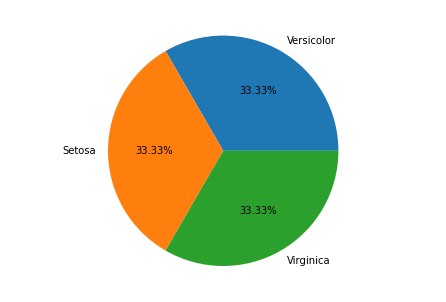

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

**The resulting pie chart will visually represent the distribution of the three iris flower species ('Versicolor', 'Setosa', and 'Virginica') based on the equal segment sizes you provided (50, 50, 50). The labels on the chart will show the species names, and the percentages will indicate the proportion of each species in the dataset.**

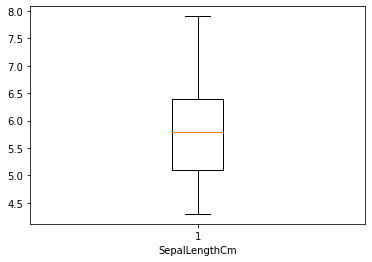

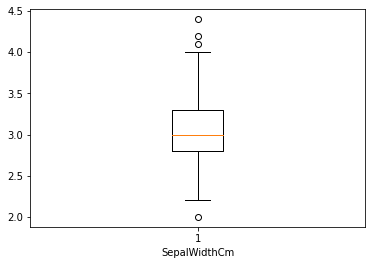

In [22]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.xlabel("SepalLengthCm")
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.xlabel("SepalWidthCm")  # naming x-axis
plt.show()

**The boxplots visually represent the distribution of data for each column, showcasing the median, quartiles, and potential outliers. This helps in identifying any unusual or extreme values in these columns, aiding in understanding the data's variability and potential data quality issues.**

<AxesSubplot:>

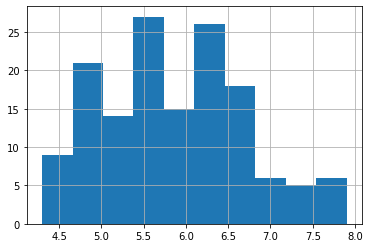

In [23]:
# histograms
df['SepalLengthCm'].hist()

**Histogram to show the distribution of sepal lengths ('SepalLengthCm') in the dataset. This helps visualize the frequency of different sepal length ranges, revealing insights about the data's central tendency and spread.**

<AxesSubplot:>

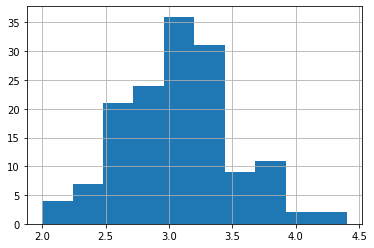

In [24]:
df['SepalWidthCm'].hist()

**The code produces a histogram displaying the distribution of sepal widths ('SepalWidthCm') in the dataset. This histogram visualizes the frequency of different sepal width ranges, helping to grasp the data's spread and patterns.**

<AxesSubplot:>

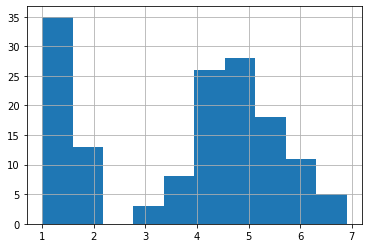

In [25]:
df['PetalLengthCm'].hist()

**creates a histogram representing the distribution of petal lengths ('PetalLengthCm') in the dataset. This histogram offers a visual summary of the frequency of different petal length ranges, aiding in understanding the data's variability and potential characteristics.**

<AxesSubplot:>

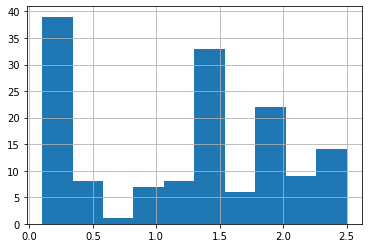

In [26]:
df['PetalWidthCm'].hist()

**generates a histogram illustrating the distribution of petal widths ('PetalWidthCm') in the dataset. This histogram provides a visual overview of the frequency of different petal width ranges, helping to analyze the data's spread and potential patterns.**

In [27]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

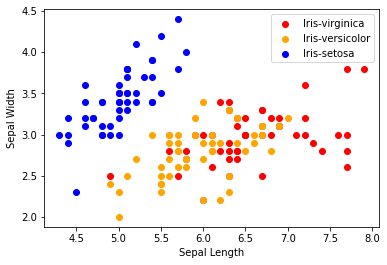

In [28]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

**I generates a scatterplot that visualizes the relationship between sepal length and sepal width for each of the three iris flower species. Different colors distinguish the species, and the legend helps identify them. This type of visualization is useful for observing how sepal dimensions vary across different species.**

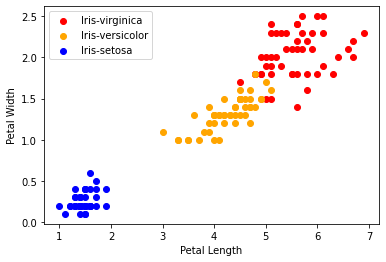

In [29]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

**I generates a scatterplot that visualizes the relationship between petal length and petal width for each of the three iris flower species. Different colors distinguish the species, and the legend helps identify them.**

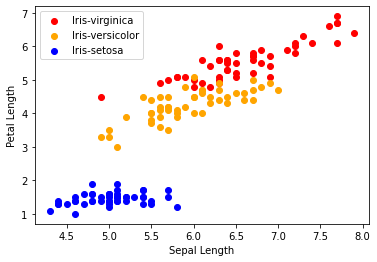

In [30]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

**I generates a scatterplot that illustrates the relationship between sepal length and petal length for each of the three iris flower species. Different colors differentiate the species, and the legend helps identify them. This visualization allows you to observe how sepal and petal dimensions are distributed across different species.**

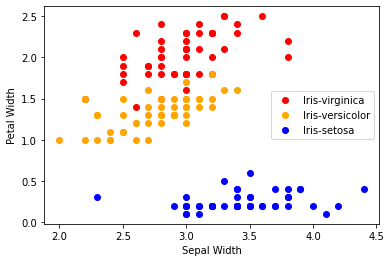

In [31]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

**generates a scatterplot that illustrates the relationship between sepal width and petal width for each of the three iris flower species. Different colors differentiate the species, and the legend helps identify them. This visualization allows you to observe how sepal and petal dimensions vary across different species.**

# Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. <br>
Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [32]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


<AxesSubplot:>

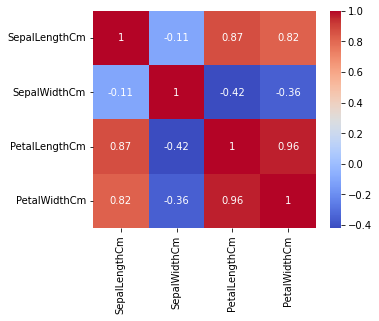

In [33]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**This heatmap visualization provides a clear visual representation of the correlation between different numeric features in the dataset. Positive and negative correlations are easily identifiable, allowing you to gain insights into relationships and dependencies among variables.**

Strong Positive Correlations: There are strong positive correlations between PetalLengthCm and PetalWidthCm (0.96), as well as between SepalLengthCm and PetalLengthCm (0.87). This suggests that as one of these features increases, the other tends to increase as well.

Moderate Positive Correlations: There is a moderate positive correlation between SepalLengthCm and PetalWidthCm (0.81), indicating that larger sepal lengths tend to be associated with larger petal widths.

Weak Negative Correlations: There is a weak negative correlation between SepalLengthCm and SepalWidthCm (-0.10), as well as between SepalWidthCm and PetalLengthCm (-0.42). These correlations suggest that as one feature increases, the other tends to decrease slightly.

No Strong Negative Correlations: None of the correlations are strongly negative (close to -1), which suggests that the features generally move in the same direction, either positively or not at all

# Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. <br>
These labels can be in the form of words or numbers. 
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [ ]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression 

model1 = LogisticRegression()

# model training
model1.fit(x_train, y_train)

# Make predictions on the test data
model_pred1 = model1.predict(x_test)


# Calculate and print the accuracy
print('Accuracy:',accuracy_score(model_pred1,y_test))

In [ ]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with 5 neighbors

knn = KNeighborsClassifier(n_neighbors=3)

# Model training
knn.fit(x_train, y_train)

# Prediction of the iris species for the test set
y_pred = knn.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)

# Model training
model3.fit(x_train, y_train)

# Make predictions on the test data
model_pred3 = model3.predict(x_test)

# Calculate and print the accuracy
print('Accuracy:',accuracy_score(model_pred3,y_test))

In [ ]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC
model4 = SVC()

#model training
model4.fit(x_train,y_train)

# Make predictions on the test data
model_pred4 = model4.predict(x_test)

from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(model_pred4,y_test))

I choose the best accuracy model are using Kneighbours classifier algorithm